# Mínimos cuadrados: caso discreto

Dada una nube de puntos $ \{ (x_{1}, y_{1}), (x_{2}, y_{2}), \ldots , (x_{m}, y_{m})  \} \subseteq \mathbb{R}^{2} $  deseamos buscar una función que provea una buena aproximación en cada uno de los $m$ puntos. Para poder abordar este problema, es necesario especificar a qué nos referimos con *buena aproximación*. 
Con este propósito, introducimos la noción de norma $2$ en $\mathbb{R}^{m}$. Dado $\mathbf{v} = ( v_{1}, \ldots, v_{m} ) \in \mathbb{R}^{m}$, tenemos que

$$ || \mathbf{v} ||_{2} = \left( \sum_{i=1}^{m} (v_{i})^{2}  \right) ^{ \frac{1}{2} }   $$ 

Consideremos la nube de puntos como dos vectores m-dimensionales: $\mathbf{x} = (x_{1}, x_{2}, \ldots , x_{m}) \in \mathbb{R}^{m}$ y $\mathbf{y} = (y_{1}, y_{2}, \ldots , y_{m}) \in \mathbb{R}^{m} $ y supongamos que buscamos un polinomio $p_{n}$ de grado menor o igual que $n$ para aproximar la nube de puntos; es decir, deseamos minimizar la distancia entre cada $y_{i}$ en la nube de puntos y los valores de $p_{n}(x_{i})$. Si denotamos por $\mathbf{p}$ el vector $m$-dimensional $( p_{n}(x_{1}), p_{n}(x_{2}), \ldots , p_{n}(x_{m}) )$ tenemos que 

$$  || \mathbf{y} - \mathbf{p} ||_{2}   =  \left( \sum_{i=1}^{m} (y_{i} - p_{n}(x_{i}))^{2}  \right) ^{ \frac{1}{2} }  $$ 

Minimizar esta expresión es equivalente a minimizar

$$  || \mathbf{y} - \mathbf{p} ||_{2}^{2}   =  \sum_{i=1}^{m} (y_{i} - p_{n}(x_{i}))^{2}     $$

Si escribimos $p_{n}(x)$ como $ \sum_{i=0}^{n} a_{i} x^{i} $ notamos que esta expresión depende únicamente de los coeficientes del polinomio. De forma que si se desea obtener un mínimo, se debe asegurar la derivada parcial de esta expresión respecto a cada coeficiente $a_{i}$, $i = 0, 1, 2, \ldots , n$ sea igual a $0$. Al realizar la derivación parcial e igualar a $0$, obtenemos el siguiente sistema de $n+1$ ecuaciones para los $n+1$ coeficientes:

$$ \begin{array}{rcr} a_{0}\langle \mathbf{1}, \mathbf{1} \rangle + a_{1}\langle \mathbf{1}, \mathbf{x} \rangle + a_{2}\langle \mathbf{1}, \mathbf{x}^{2} \rangle + \ldots + a_{n}\langle \mathbf{1}, \mathbf{x}^{n} \rangle
& = & \langle \mathbf{y}, \mathbf{1} \rangle \\ 
a_{0}\langle \mathbf{x}, \mathbf{1} \rangle + a_{1}\langle \mathbf{x}, \mathbf{x} \rangle + a_{2}\langle \mathbf{x}, \mathbf{x}^{2} \rangle + \ldots + a_{n}\langle \mathbf{x}, \mathbf{x}^{n} \rangle
& = & \langle \mathbf{y}, \mathbf{x} \rangle \\  \vdots \\ 
a_{0}\langle \mathbf{x}^{n}, \mathbf{1} \rangle + a_{1}\langle \mathbf{x}^{n}, \mathbf{x} \rangle + a_{2}\langle \mathbf{x}^{n}, \mathbf{x}^{2} \rangle + \ldots + a_{n}\langle \mathbf{x}^{n}, \mathbf{x}^{n} \rangle
& = & \langle \mathbf{y}, \mathbf{x}^{n} \rangle  \end{array} $$

donde denotamos por $\mathbf{x} ^{i}$ el vector $(x_{1}^{i}, x_{2}^{i}, \ldots , x_{m}^{i})$ y $\langle \mathbf{v}, \mathbf{w} \rangle = \sum_{i=1}^{m} v_{i} w_{i}  $ es el producto interno en $\mathbb{R} ^{m}$. Para el enfoque polinomial, resolvemos este sistema de ecuaciones para buscar los coeficientes.
Si se sospecha que los datos tienen una relación exponencial, minimizamos

$$ \sum_{i=1}^{m} (y_{i} - a_{0} e^{a_{1} x_{i}})^{2}     $$

linealizando la expresión como 

$$ \sum_{i=1}^{m} (\ln(y_{i}) - ( \ln(a_{0}) + a_{1} x_{i} ))^{2}  $$

Si sospechamos que los datos tienen una relación potencial, en su lugar minimizamos

$$ \sum_{i=1}^{m} (y_{i} - a_{0} x^{a_{1}})^{2} $$ 

linealizando como 

$$ \sum_{i=1}^{m} (\ln(y_{i}) - ( \ln(a_{0}) + a_{1} \ln( x_{i}) ))^{2}  $$

Por último, si los datos tienen una relación logarítmica, minimizamos

$$ \sum_{i=1}^{m} (y_{i} - ( a_{0} + a_{1} \ln( x_{i}) ))^{2}  $$

## Dependencias

In [2]:
from sympy import *
from sympy.abc import x
from mpmath import nsum

from IPython.display import display, Latex
from ipywidgets import interact, widgets, Layout
import ipywidgets as widgets

import numpy as np


from sympy.interactive import printing;
printing.init_printing(use_latex=True);

## Desarrollo

In [3]:
n = int(input('Cantidad de puntos a ingresar: '))

Cantidad de puntos a ingresar: 8


In [7]:
puntos_x = []
puntos_y = []
for i in range(n):
    puntos_x.append(float(input('x{:d} = '.format(i))))
    puntos_y.append(float(input('y{:d} = '.format(i))))

minval = maxval = puntos_x[0]
for value in puntos_x:
    if value < minval:
        minval = value
    if value > maxval:
        maxval = value 
    
display(Latex('$$ \mathbf{x} = '+latex(puntos_x)+'$$'))
display(Latex('$$ \mathbf{y} = '+latex(puntos_y)+'$$'))


x0 = 120
y0 = 0
x1 = 102
y1 = 0.3
x2 = 75
y2 = 0.6
x3 = 64
y3 = 0.9
x4 = 32
y4 = 1.2
x5 = 15
y5 = 1.5
x6 = 4
y6 = 1.8
x7 = 1
y7 = 2.1


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
case = 1

dropdown = widgets.Dropdown(
    options = {'Polinomial' : 1, 'Exponencial' : 2, 'Potencial' : 3, 'Logarítmica' : 4},
    value = 1,
    description = 'Tipo de regresión: '
);
display(dropdown)

Dropdown(description='Tipo de regresión: ', options={'Polinomial': 1, 'Exponencial': 2, 'Potencial': 3, 'Logar…

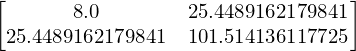

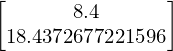

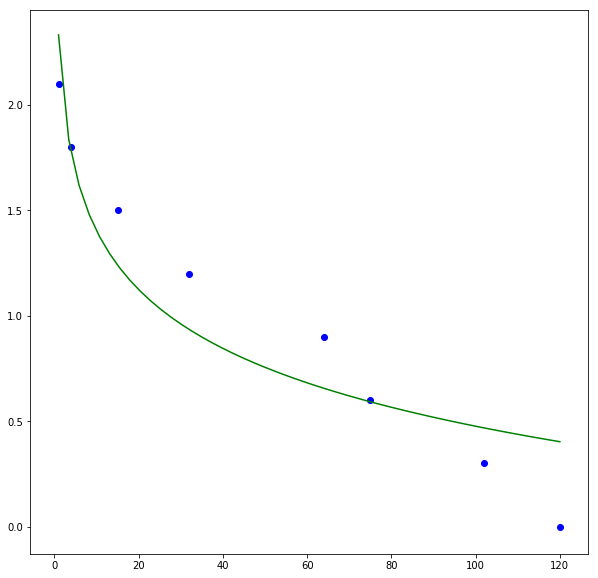

In [8]:
#Obtenemos la opción seleccionada
case = dropdown.value

import matplotlib.pyplot as plt;

fig, ax = plt.subplots(figsize=(10, 10));

coeffs = []

#Regresión polinomial
if case == 1:
    
    while True:
        degree = int(input('Grado del polinomio: '))
        if degree > 0:
            break
    A = Matrix(degree+1, degree+1, lambda i, j: nsum( lambda k: (puntos_x[int(k)])**(i+j), [0, len(puntos_x)-1]) )

    B = Matrix(degree+1, 1, lambda i, j: nsum(lambda k: puntos_y[int(k)]*(puntos_x[int(k)])**i , [0, len(puntos_y)-1]) )
    #Declaramos un arreglo para los coeficientes
    
    for i in range(0, degree+1):
        coeffs.append(Symbol('a'+str(i)))

    #Resolvemos el sistema de ecuaciones
    c = linsolve((A, B), coeffs)
    
    #Construimos el polinomio
    pol = c.args[0].args[0]
    for i in range(1, degree+1):
        pol += (c.args[0].args[i])*x**i
        
#Regresión exponencial      
elif case == 2:
    
    A = Matrix(2, 2, lambda i, j: nsum( lambda k: (puntos_x[int(k)])**(i+j), [0, len(puntos_x) -1]))
    B = Matrix(2, 1, lambda i, j: nsum( lambda k: ln(puntos_y[int(k)]) * (puntos_x[int(k)])**i, [0, len(puntos_y) -1]))
    
    coeffs = [Symbol('a0'), Symbol('a1')]
    
    c = linsolve((A, B), coeffs)
    
    pol = exp(c.args[0].args[0]) * E**(c.args[0].args[1]*x)
    
#Regresión potencial    
elif case == 3:

    A = Matrix(2, 2, lambda i, j: nsum( lambda k: (ln(puntos_x[int(k)]))**(i+j), [0, len(puntos_x)-1]) )
    B = Matrix(2, 1, lambda i, j: nsum(lambda k: ln(puntos_y[int(k)])*(ln(puntos_x[int(k)]))**i , [0, len(puntos_y)-1]) )
    
    coeffs = [Symbol('a0'), Symbol('a1')]
    
    c = linsolve((A, B), coeffs)
    
    pol = exp(c.args[0].args[0]) * x ** c.args[0].args[1]

#Regresión logarítmica    
elif case == 4:
    A = Matrix(2, 2, lambda i, j: nsum( lambda k: (ln(puntos_x[int(k)]))**(i+j), [0, len(puntos_x)-1]) )
    B = Matrix(2, 1, lambda i, j: nsum(lambda k: ln(puntos_x[int(k)])**i * (puntos_y[int(k)]) , [0, len(puntos_y)-1]) )
    
    coeffs = [Symbol('a0'), Symbol('a1')]
    
    display(A)
    display(B)
    
    c = linsolve((A, B), coeffs)

    
    pol = c.args[0].args[0] + c.args[0].args[1] * log(x)

         


xpoints = np.array(puntos_x);
ypoints = np.array(puntos_y);

lambdaf = lambdify(x, pol);
xv = np.linspace(minval , maxval  , 50);
ax.plot(xv, lambdaf(xv), color='green');
ax.scatter(xpoints, ypoints, color='blue', marker='o');
plt.show();    

display(pol)

## Referencias

[B&F] Burden, R. L., & Faires, D. J. & Burden, A. M. (2017). Aproximación por mínimos cuadrados discretos. En *Análisis numérico*, 10a ed. Cengage Learning.


[S&M] Süli, E., & Mayers, D. F. (2002). Solutions of systems of linear equations. En *An introduction to numerical analysis*. Cambridge: Cambridge University Press.